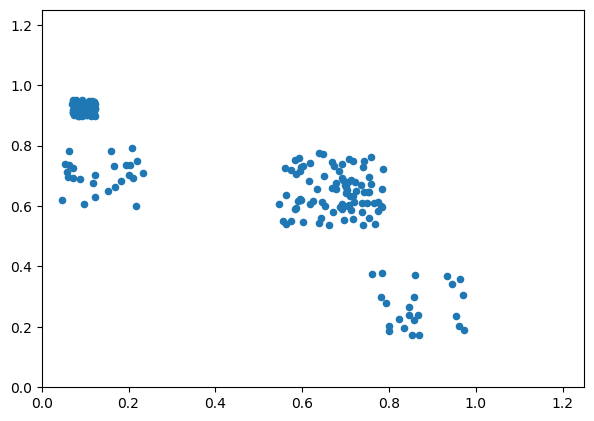

In [566]:
# Генерация множества точек на плоскости с несколькими сгущениями

import random
seed = 19654606
np.random.seed(seed)
random.seed(seed)
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = list()
y = list()

for i in range(0, 5):
    n = random.randint(15, 70)
    r = random.random() / 4
    centerX = random.random()
    centerY = random.random()
    x = x + list(centerX + np.random.rand(n) * r)
    y = y + list(centerY + np.random.rand(n) * r)
    
axes = plt.gca()
axes.set_xlim([0, 1.25])
axes.set_ylim([0, 1.25])

plt.scatter(x, y, c = 'tab:blue', s = 20.0)
plt.show()

In [567]:
def d(x1, y1, x2, y2):
    p = len(x)
    return ((x1 - x2)**2 + (y1 - y2)**2)**(1/2)

def differ(x, y):
    for i in range(0, len(x)):
        if (x[i] != y[i]):
            return True
    return False

def targetFunction(xCluster, yCluster, xCenter, yCenter):
    k = len(xCenter)
    sum = 0
    for i in range(0, k):
        for j in range(0, len(xCluster[i])):
            sum += d(xCluster[i][j], yCluster[i][j], xCenter[i], yCenter[i])
    return sum

In [568]:
# k - количество кластеров
# x, y - координаты точек

def kMeansSimple(k, x, y):
    # Определяем рамки, в которых находятся точки
    epsilon = 0.1
    x0 = min(x) - epsilon
    y0 = min(y) - epsilon
    width = max(x) - min(x) + 2 * epsilon
    height = max(y) - min(y) + 2 * epsilon

    # Координаты центроидов
    xCenter = x0 + np.random.rand(k) * width
    yCenter = y0 + np.random.rand(k) * height
    xCenterPrev = xCenter - 1
    yCenterPrev = yCenter - 1

    # Координаты кластеров
    xCluster = [[] for i in range(0, k)]
    yCluster = [[] for i in range(0, k)]
    cluster = [0]*len(x)


    while (differ(xCenter, xCenterPrev) & differ(yCenter, yCenterPrev)):
        xCluster = [[] for i in range(0, k)]
        yCluster = [[] for i in range(0, k)]

        for point in range(0, len(x)):
            minDist = -1;
            bestCluster = -1;
            for i in range(0, k):
                distance = d(xCenter[i], yCenter[i], x[point], y[point])
                if (minDist < 0 or distance < minDist):
                    minDist = distance
                    bestCluster = i
            xCluster[bestCluster].append(x[point])
            yCluster[bestCluster].append(y[point])
            cluster[point] = bestCluster

        xCenterPrev = xCenter
        xCenterPrev = xCenter
        for i in range(0, k):
            n = len(xCluster[i])
            if (n != 0):
                xCenter[i] = sum(xCluster[i][j] for j in range(0, n)) / n
                yCenter[i] = sum(yCluster[i][j] for j in range(0, n)) / n
                
    return (xCenter, yCenter, xCluster, yCluster, cluster)

In [569]:
def kMeansMultiple(k, x, y, trials):
    xCenter0, yCenter0, xCluster0, yCluster0, cluster0 = kMeansSimple(k, x, y)
    min = targetFunction(xCluster0, yCluster0, xCenter0, yCenter0)
    
    for i in range(0, trials):
        xCenter, yCenter, xCluster, yCluster, cluster = kMeansSimple(k, x, y)
        if (targetFunction(xCluster, yCluster, xCenter, yCenter) < min):
            xCenter0, yCenter0, xCluster0, yCluster0, cluster0 = xCenter, yCenter, xCluster, yCluster, cluster
    return (xCenter0, yCenter0, xCluster0, yCluster0, cluster0)

In [578]:
def kMeans(x, y, eps = 1, trials = 50):
    k = 1
    xCenter, yCenter, xCluster, yCluster, cluster = kMeansMultiple(k, x, y, trials)
    curr = targetFunction(xCluster, yCluster, xCenter, yCenter) 
    prev = curr - 2 * eps

    while (abs(curr - prev) > eps):
        k += 1
        xCenter, yCenter, xCluster, yCluster, cluster = kMeansMultiple(k, x, y, trials)
        prev = curr
        curr = targetFunction(xCluster, yCluster, xCenter, yCenter)
    return (xCluster, yCluster, cluster)

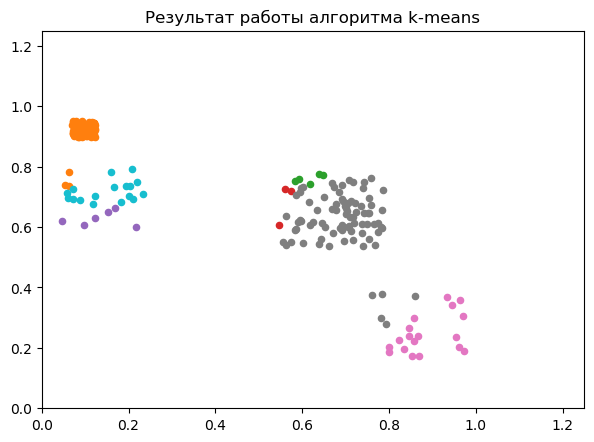

In [579]:
xClusterKMeans, yClusterKMeans, clusterKMeans = kMeans(x, y)
for i in range(0, len(xClusterKMeans)):
    plt.scatter(xClusterKMeans[i], yClusterKMeans[i], s = 20.0)
    
axes = plt.gca()
axes.set_xlim([0, 1.25])
axes.set_ylim([0, 1.25])
plt.title('Результат работы алгоритма k-means')
plt.show()

In [580]:
def dbscan(x, y, minPts = 8, eps = 0.15):
    n = len(x)
    visited = [False]*n

    distances = []
    for i in range(0, len(x)):
        distances.append([d(x[i], y[i], x[j], y[j]) for j in range(0, n)])

    clusterIndex = 0
    clusterX = []
    clusterY = []
    cluster = [0]*len(x)
    for i in range(0, n):
        if (not visited[i]):
            neighbours = 0
            for j in range(0, n):
                if (distances[i][j] < eps):
                    neighbours += 1
            if (neighbours < minPts):
                break
                
            visited[i] = True
            clusterX.append([x[i]])
            clusterY.append([y[i]])
            cluster[i] = clusterIndex
            
            for j in range(0, n):
                if (distances[i][j] < eps and not visited[j]):
                    visited[j] = True
                    clusterX[clusterIndex].append(x[j])
                    clusterY[clusterIndex].append(y[j])
            clusterIndex += 1
    return (clusterX, clusterY, cluster)

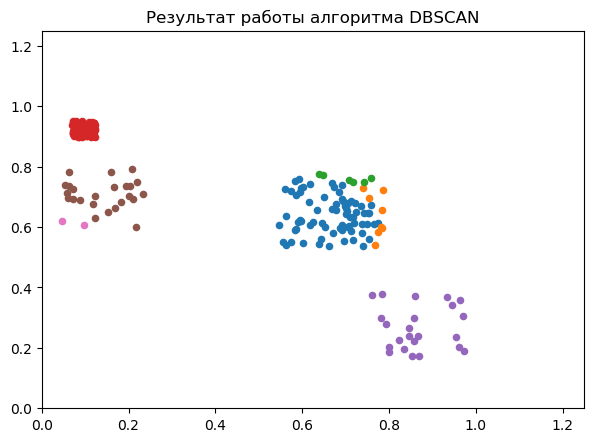

In [581]:
xClusterDBSCAN, yClusterDBSCAN, clusterDBSCAN = dbscan(x, y)
for i in range(0, len(xClusterDBSCAN)):
    plt.scatter(xClusterDBSCAN[i], yClusterDBSCAN[i], s = 20.0)
    
axes = plt.gca()
axes.set_xlim([0, 1.25])
axes.set_ylim([0, 1.25])
plt.title('Результат работы алгоритма DBSCAN')
plt.show()

In [583]:
def averageInsideCluster(i, x, y, xCluster, yCluster, cluster):
    sum = 0
    clusterIndex = cluster[i]
    clusterSize = len(xCluster[clusterIndex])
    for j in range(clusterSize):
        sum += d(x[i], y[i], xCluster[clusterIndex][j], yCluster[clusterIndex][j])
    if (clusterSize != 0):
        return sum / clusterSize
    else:
        return 0

def findClosestCluster(i, x, y, cluster):
    min = -1
    minClusterIndex = 0
    for j in range(0, len(x)):
        if (cluster[j] != cluster[i] and (min < 0 or d(x[i], y[i], x[j], y[j]) < min)):
            min = d(x[i], y[i], x[j], y[j])
            minClusterIndex = cluster[j]
    return minClusterIndex

def averageRelativeToOtherCluster(i, x, y, xCluster, yCluster, cluster, otherClusterIndex):
    sum = 0
    otherClusterSize = len(xCluster[otherClusterIndex])
    for j in range(otherClusterSize):
        sum += d(x[i], y[i], xCluster[otherClusterIndex][j], yCluster[otherClusterIndex][j])
    if (otherClusterSize != 0):
        return sum / otherClusterSize
    else:
        return 0

def rateClusterization(x, y, xCluster, yCluster, cluster):
    sum = 0
    for i in range(len(x)):
        a = averageInsideCluster(i, x, y, xCluster, yCluster, cluster)
        b = averageRelativeToOtherCluster(i, x, y, xCluster, yCluster, cluster, findClosestCluster(i, x, y, cluster))
        sum += (b - a) / max([a, b])
    return sum / len(x)

print('Метрика Силуэт для k-means:')
print(rateClusterization(x, y, xClusterKMeans, yClusterKMeans, clusterKMeans))
print('')
print('Метрика Силуэт для BSCAN:')
print(rateClusterization(x, y, xClusterDBSCAN, yClusterDBSCAN, clusterDBSCAN))

Метрика Силуэт для k-means:
0.42384949818105844

Метрика Силуэт для BSCAN:
-0.47604833950373326
